In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
df = pd.read_csv('facial-keypoints-detection/training.zip', compression='zip')

In [5]:
df.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [6]:
df.isnull().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

In [7]:
df.fillna(method = 'ffill', inplace = True)
df.isnull().sum().any()

False

In [8]:
m,n =df.shape

In [9]:
img = []
img_size = 96
for i in range(m):
    spliting = np.array(df['Image'][i].split(' '),dtype = 'float64')
    splitting = np.reshape(spliting,(img_size,img_size,1))
    splitting /= 255 
    img.append(splitting)
img = np.array(img)

In [10]:
df.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [11]:
X_train = img
df.drop('Image',axis = 1, inplace = True)
y_train = []

for i in range(len(df)):
    y = df.iloc[i,:].values
    y_train.append(y)

In [12]:
y_train= np.array(y_train, dtype = 'float')

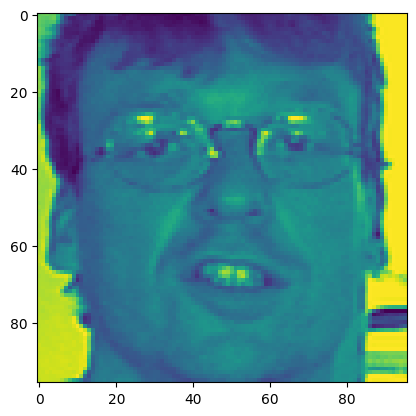

In [13]:
plt.imshow(X_train[1000])

In [14]:
def image_with_keypoints(df, index):
    image = plt.imshow(X_train[index],cmap = 'gray')
    l = []
    for i in range(1,31,2):
        l.append(plt.plot(y_train[index][i-1],y_train[index][i],'r*'))
    return image,l

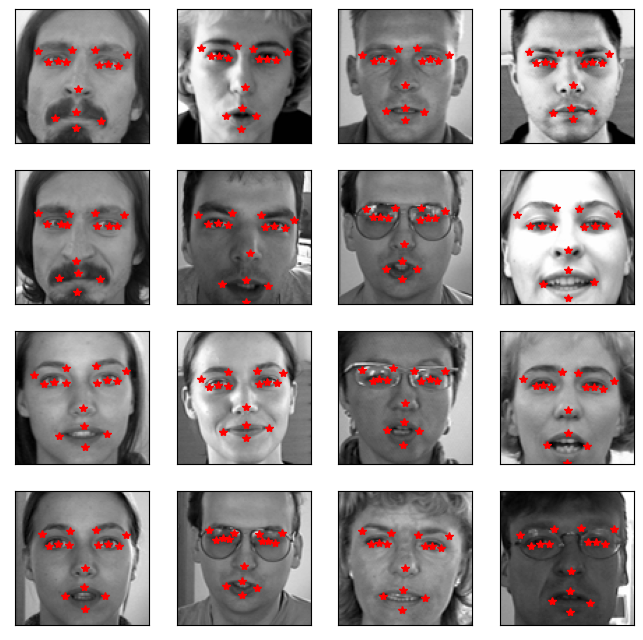

In [15]:
fig = plt.figure(figsize=(8,8))

for i in range(16):
    ax = fig.add_subplot(4,4, i+1, xticks = [], yticks = [])
    image_with_keypoints(X_train, i)
plt.show()

In [16]:
model = Sequential([
    Conv2D(128, (3, 3),strides=1,activation='relu',padding = 'same', input_shape=(96, 96, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), strides=1,activation='relu',padding = 'same'),
    Dropout(0.1),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), strides=1,activation='relu',padding = 'same'),
    Dropout(0.2),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), strides=1,activation='relu',padding = 'same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.1),
    Dense(256, activation='relu'),
    Dropout(0.1),
    Dense(128, activation='relu'),
    Dense(30)
])


In [17]:
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mae',metrics = ['accuracy'])


In [18]:
history = model.fit(X_train.reshape(-1, 96, 96, 1), y_train, epochs=50, batch_size=32,validation_split=0.2)


Epoch 1/50


2023-05-03 21:18:13.015400: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


177/177 [==============================] - 21s 58ms/step - loss: 6.2171 - accuracy: 0.4054 - val_loss: 13.2415 - val_accuracy: 0.5858
Epoch 2/50
177/177 [==============================] - 9s 54ms/step - loss: 3.8845 - accuracy: 0.5279 - val_loss: 10.6650 - val_accuracy: 0.6872
Epoch 3/50
177/177 [==============================] - 10s 55ms/step - loss: 3.6689 - accuracy: 0.5591 - val_loss: 5.7680 - val_accuracy: 0.6872
Epoch 4/50
177/177 [==============================] - 9s 53ms/step - loss: 3.5625 - accuracy: 0.5904 - val_loss: 5.7745 - val_accuracy: 0.6801
Epoch 5/50
177/177 [==============================] - 9s 54ms/step - loss: 3.3022 - accuracy: 0.6052 - val_loss: 4.4291 - val_accuracy: 0.6766
Epoch 6/50
177/177 [==============================] - 10s 55ms/step - loss: 3.4721 - accuracy: 0.6272 - val_loss: 6.8352 - val_accuracy: 0.5858
Epoch 7/50
177/177 [==============================] - 10s 54ms/step - loss: 3.2333 - accuracy: 0.6443 - val_loss: 7.5820 - val_accuracy: 0.6397
Epoc

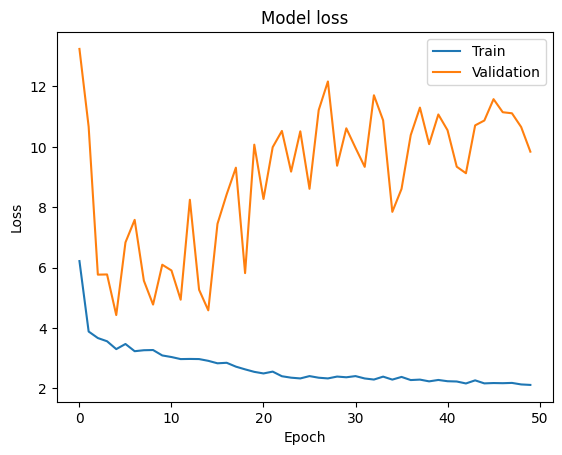

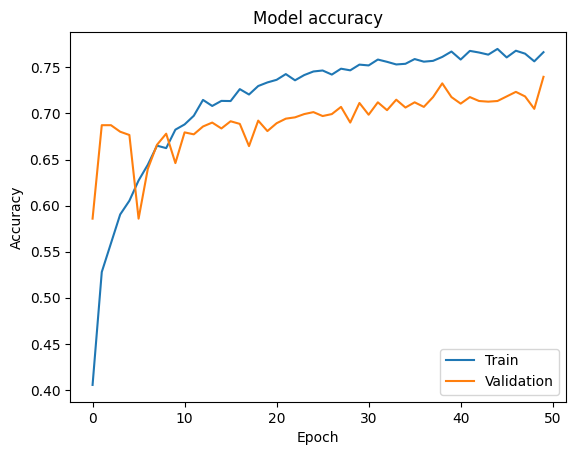

In [19]:
import matplotlib.pyplot as plt

def plot_history_loss(history):
    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()
def plot_history_acc(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='lower right')
    plt.show()
    

plot_history_loss(history)
plot_history_acc(history)

In [20]:
df_test = pd.read_csv('/facial-keypoints-detection/test.zip', compression='zip')

In [21]:
X_test = np.array([np.fromstring(x, dtype=int, sep=' ') for x in df_test['Image']])
X_test = X_test.reshape(-1, 96, 96, 1) / 255.0

# Make predictions
y_test_pred = model.predict(X_test)

56/56 [==============================] - 1s 14ms/step


In [22]:
y_test_pred

array([[54.58911 , 30.225199, 25.11953 , ..., 56.49438 , 38.715927,
        69.06254 ],
       [56.43024 , 30.126553, 24.249226, ..., 60.906265, 41.164814,
        73.351395],
       [55.43304 , 30.782139, 26.549446, ..., 57.498615, 42.179943,
        67.885216],
       ...,
       [51.835857, 30.286728, 24.19888 , ..., 58.66543 , 35.19153 ,
        59.033234],
       [51.658894, 29.883526, 24.580643, ..., 58.744736, 36.436737,
        58.78291 ],
       [55.862186, 33.94457 , 26.695177, ..., 64.53326 , 38.65762 ,
        65.300476]], dtype=float32)

In [23]:
test_images = []
for i in range(len(df_test)):
    item = np.array(df_test['Image'][i].split(' '), dtype='float')
    item = np.reshape(item, (img_size, img_size, 1))
    item /= 255
    test_images.append(item)
    
test_images = np.array(test_images, dtype='float')

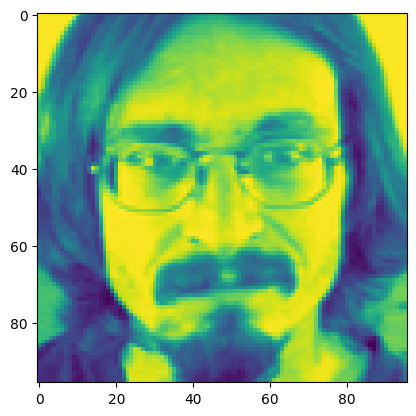

In [24]:
plt.imshow(test_images[100].reshape(96, 96))
plt.show()

In [25]:
predict = model.predict(test_images)

56/56 [==============================] - 1s 9ms/step


In [26]:
IdLookupTable = pd.read_csv('facial-keypoints-detection/IdLookupTable.csv')

In [27]:
feature_names = list(IdLookupTable['FeatureName'])
image_ids = list(IdLookupTable['ImageId']-1)
row_ids = list(IdLookupTable['RowId'])

feature_list = []
for feature in feature_names:
    feature_list.append(feature_names.index(feature))

In [28]:
predictions = []
for x,y in zip(image_ids, feature_list):
    predictions.append(predict[x][y])

In [29]:
row_ids = pd.Series(row_ids, name = 'RowId')
locations = pd.Series(predictions, name = 'Location')
locations = locations.clip(0.0,96.0)
submission_result = pd.concat([row_ids,locations],axis = 1)
submission_result.to_csv('submission.csv',index = False)